In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import FaIR_ensemble

# Showcase of emulator speed in emulating spatially explicit response functions using FaIR

### A Calibrated, Constrained Ensemble from FaIR
Taken from https://docs.fairmodel.net/en/latest/examples/calibrated_constrained_ensemble.html, the below cell will setup and run the constrained ensemble. The following cells will create some plots from the ensemble and then show how to get spatially resolved ensembles.

In [4]:
# Setup and run ensemble
f = FaIR_ensemble.FaIR_ensemble()

Running 8008 projections in parallel: 100%|██████████| 550/550 [01:56<00:00,  4.73timesteps/s]


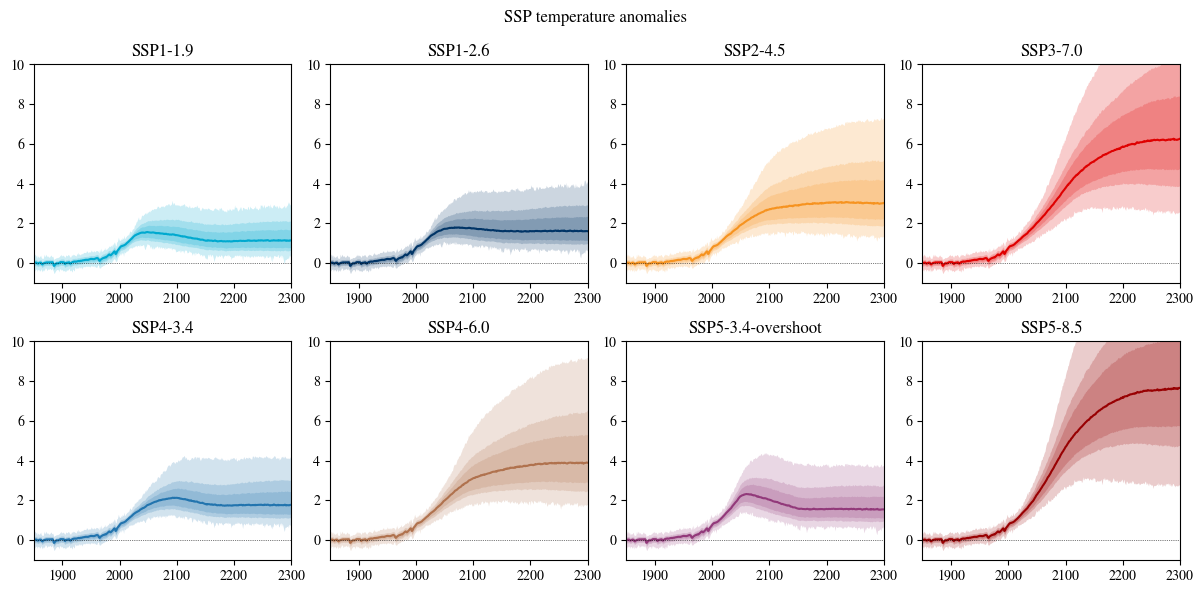

In [10]:
# Plot SSP temperature anomalies
FaIR_ensemble.plot_temp_FaIR(f)

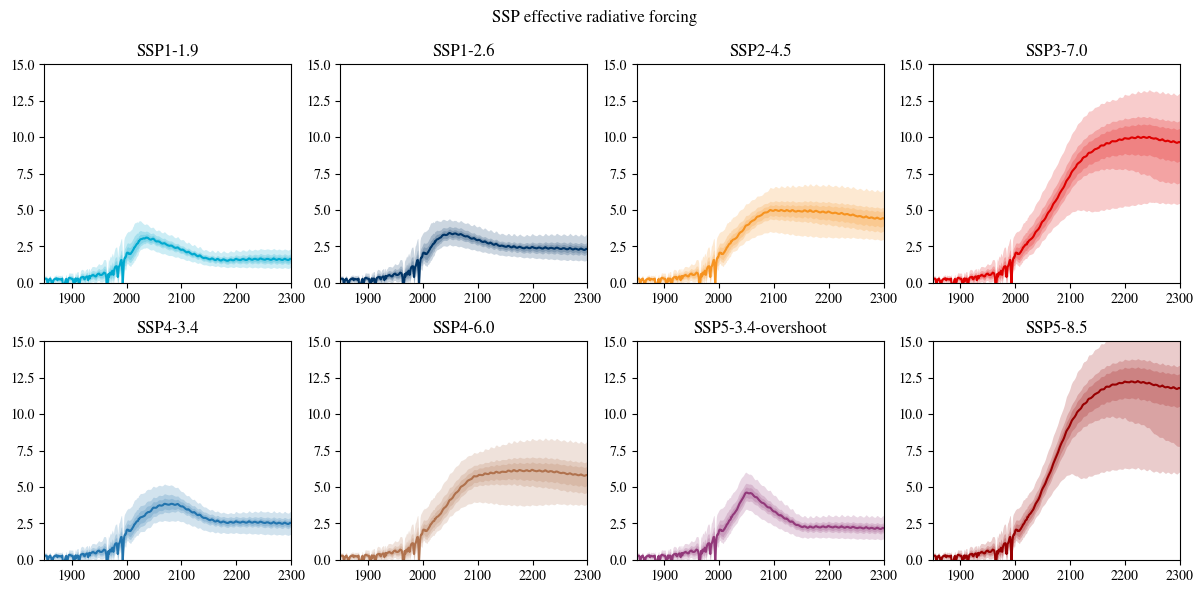

In [11]:
# Plot SSP ERF profiles
FaIR_ensemble.plot_ERF_FaIR(f)

In [ ]:
scenario_init = 'ssp126'
f.forcing_sum.loc[dict(scenario=scenario_init)].sel(timebounds=slice(1850,2100))

# Run spatial ensemble

Convolving FaIR with 1pctCO2 Green's Function...
Scenario: ssp245
	Location: Global Mean
		Ensemble run time: 1.4759788513183594
	Location: Kalahari Desert
		Ensemble run time: 1.3665125370025635
	Location: Palau
		Ensemble run time: 1.3462765216827393
Scenario: ssp585
	Location: Global Mean
		Ensemble run time: 1.3996033668518066
	Location: Kalahari Desert
		Ensemble run time: 1.3601150512695312
	Location: Palau
		Ensemble run time: 1.378084659576416


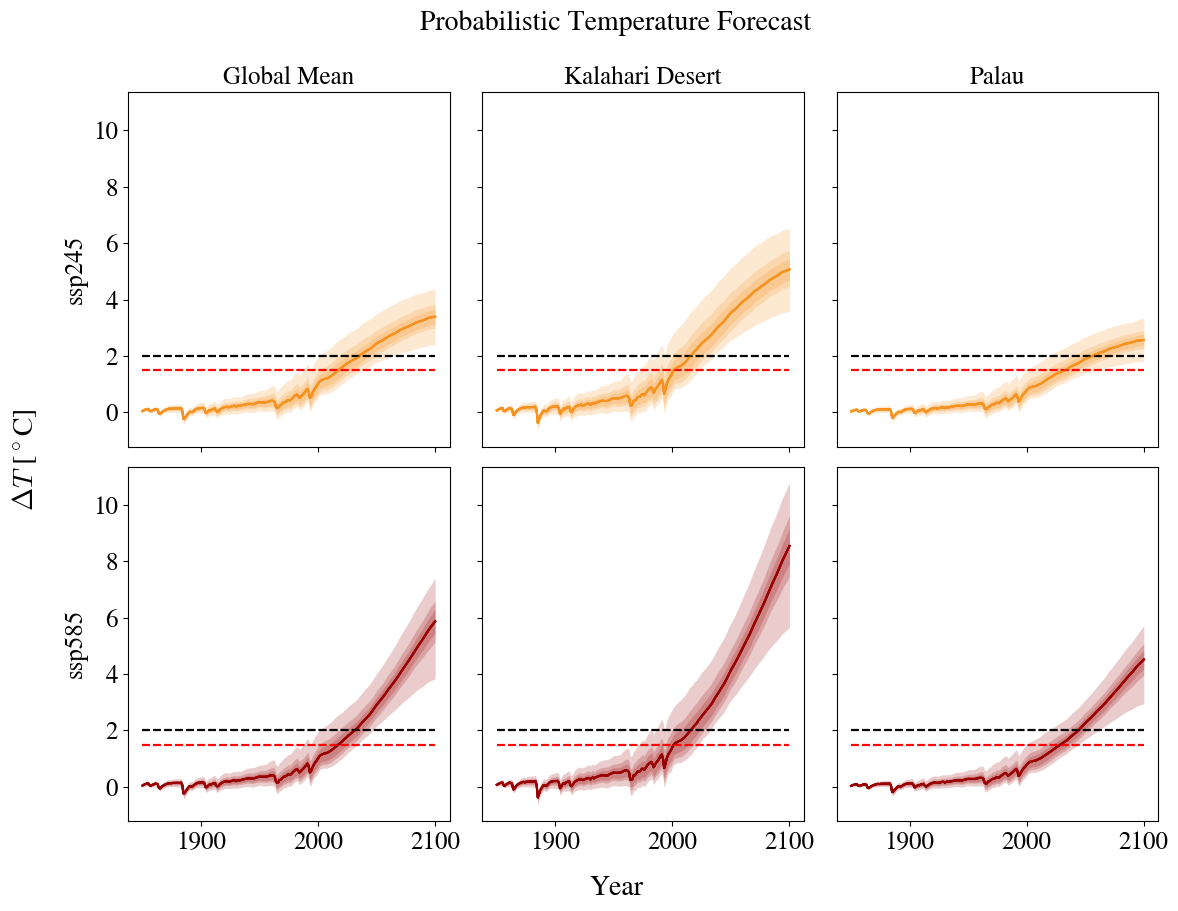

In [21]:
# Specify if we want to plot and/or save results
save_fig = False
time_run = True

# Select experiment used for training
train_id = '1pctCO2'
print(f'Convolving FaIR with {train_id} Green\'s Function...')

# Set ensemble parameters
lat_lon = [0,(-20.5, 21),(7.5, 134)]
labels = ['Global Mean','Kalahari Desert','Palau']
scens = ['ssp245','ssp585']
scens_cap = ['SSP245','SSP585']

# Convolve with FaIR scenarios and plot results
# Currently only configured for global mean + two locations, can be modified inside FaIR_ensemble.py
all_conv = FaIR_ensemble.run_spatial_ensemble(f, train_id, lat_lon, labels, scens, save_fig = save_fig, time_run = time_run, scens_cap = scens_cap)